# Machine Learning 20: Mastering in Confusion Matrix 

### What is Confusion Matrix?
A **confusion matrix** is a table used to evaluate the performance of a classification algorithm, especially for binary classification problems. It is defined as:

|                     | **Predicted Positive** | **Predicted Negative** |
| ------------------- | ---------------------- | ---------------------- |
| **Actual Positive** | True Positive (TP)     | False Negative (FN)    |
| **Actual Negative** | False Positive (FP)    | True Negative (TN)     |

### Key Metrics Derived from the Confusion Matrix:

#### 1. **Accuracy**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

#### 2. **Precision (Positive Predictive Value)**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

* How many of the predicted positives were actually positive?
* High precision = low false positive rate.

#### 3. **Recall / Sensitivity / True Positive Rate**

$$
\text{Recall (Sensitivity)} = \frac{TP}{TP + FN}
$$

* How many actual positives were correctly predicted?
* High recall = low false negative rate.

#### 4. **F1-Score** (Harmonic mean of Precision and Recall)

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

* Useful when the class distribution is imbalanced.

### 🧠 Example:

If a model predicts:

* TP = 80, FP = 10, FN = 20, TN = 90

Then:

* **Precision** = 80 / (80 + 10) = 0.888
* **Recall** = 80 / (80 + 20) = 0.8
* **F1-score** = 2 × (0.888 × 0.8) / (0.888 + 0.8) ≈ 0.842
* **Accuracy** = (80 + 90) / (80 + 90 + 10 + 20) = 170 / 200 = 0.85


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
# Load the dataset
df = pd.read_csv("placement1.csv")
df.head(3)

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0


In [3]:
# Features and target
X = df.iloc[:, :-1]
y = df["placement"]

In [4]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train logistic regression model
lr = LogisticRegression()

In [6]:
lr.fit(X_train, y_train)

LogisticRegression()

In [7]:
lr.score(X_test,y_test)*100

85.0

In [8]:
y_pred = lr.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [10]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[9 1]
 [2 8]]


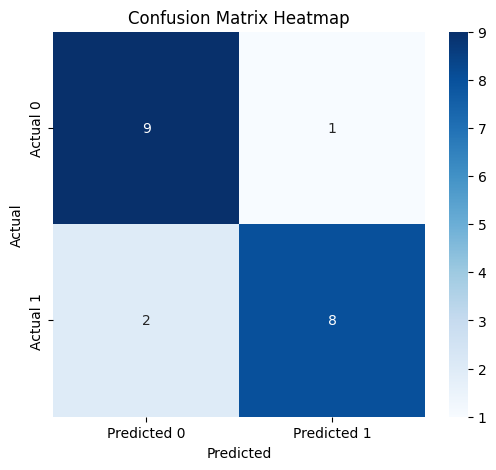

In [11]:
# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0','Predicted 1'],
            yticklabels=['Actual 0','Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [12]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85
Precision: 0.8888888888888888
Recall: 0.8
F1 Score: 0.8421052631578947

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20




###  Summary Table:

| Metric    | Formula                                         | Meaning                              |
| --------- | ----------------------------------------------- | ------------------------------------ |
| Precision | TP / (TP + FP)                                  | Correctness of positive predictions  |
| Recall    | TP / (TP + FN)                                  | Ability to find all positive cases   |
| F1-Score  | 2 × (Precision × Recall) / (Precision + Recall) | Balance between Precision and Recall |
| Accuracy  | (TP + TN) / (TP + TN + FP + FN)                 | Overall correctness                  |
